In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import torch
import matplotlib.pyplot as plt

/home/jungredda/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


blue tensor([[6.0000e+00, 4.1439e-03],
        [6.0000e+00, 5.4245e-03],
        [6.0000e+00, 5.4245e-03],
        [6.0000e+00, 5.2356e-03],
        [6.0000e+00, 5.2355e-03],
        [6.0000e+00, 5.3572e-03],
        [6.0000e+00, 5.3573e-03],
        [6.0000e+00, 4.7315e-03],
        [6.0000e+00, 4.7317e-03],
        [6.0000e+00, 4.9586e-03],
        [6.0000e+00, 4.9591e-03],
        [6.0000e+00, 4.7985e-03],
        [6.0000e+00, 4.7969e-03],
        [6.0000e+00, 5.0259e-03],
        [6.0000e+00, 5.0254e-03],
        [6.0000e+00, 4.5698e-03],
        [6.0000e+00, 4.5696e-03],
        [6.0000e+00, 5.0673e-03],
        [6.0000e+00, 5.0682e-03],
        [6.0000e+00, 5.1200e-03],
        [6.0000e+00, 5.1199e-03],
        [6.0000e+00, 4.9197e-03],
        [6.0000e+00, 4.9195e-03],
        [6.0000e+00, 4.5936e-03],
        [6.0000e+00, 4.5939e-03]])
blue tensor([[6.0000, 0.0242],
        [6.0000, 0.0079],
        [6.0000, 0.0079],
        [6.0000, 0.0089],
        [6.0000, 0.0089],
        [

green tensor([[6.0000e+00, 1.2867e-02],
        [7.0000e+00, 6.5499e-03],
        [8.0000e+00, 5.5635e-03],
        [9.0000e+00, 5.6207e-03],
        [1.0000e+01, 5.8622e-03],
        [1.1000e+01, 5.4953e-03],
        [1.2000e+01, 5.8426e-03],
        [1.3000e+01, 5.9063e-03],
        [1.4000e+01, 6.3875e-03],
        [1.5000e+01, 5.9680e-03],
        [1.6000e+01, 5.5618e-03],
        [1.7000e+01, 5.7142e-03],
        [1.8000e+01, 5.7274e-03],
        [1.8000e+01, 3.3021e-04]])
green tensor([[6.0000e+00, 3.0103e-03],
        [7.0000e+00, 6.5721e-03],
        [8.0000e+00, 4.6900e-03],
        [9.0000e+00, 5.4234e-03],
        [1.0000e+01, 6.0688e-03],
        [1.1000e+01, 5.8540e-03],
        [1.2000e+01, 5.5584e-03],
        [1.3000e+01, 6.2277e-03],
        [1.4000e+01, 5.4388e-03],
        [1.5000e+01, 5.2797e-03],
        [1.6000e+01, 5.8646e-03],
        [1.7000e+01, 5.5847e-03],
        [1.8000e+01, 5.4543e-03],
        [1.8000e+01, 7.5400e-05]])
green tensor([[6.0000e+00, 6.2835e

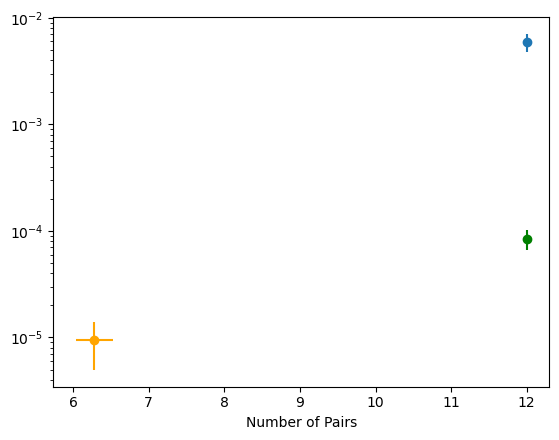

In [36]:
distance = [0.1]
pairs = [12]
seeds = range(200)
for d in distance:
    for p in pairs:
        results = []
        for s in seeds:
            folder_name = "results/Spherical_{}_{}_pair_experiments".format(d, p)
            path = folder_name + "/Spherical/VoISim/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
                print("blue",df["OC_GP"])
                
        mean_results = np.mean(results)
        MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
        plt.scatter(p, mean_results, color= 'C0')
        plt.errorbar(p, mean_results, yerr=MSE_results, linestyle='', color= 'C0')
    
    for p in pairs:
        results = []
        for s in seeds:
            folder_name = "results/base_Spherical_{}_{}_pair_experiments".format(d, p)
            path = folder_name + "/Spherical/VoISim/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
                print("green",df["OC_GP"])
                
        mean_results = np.mean(results)
        MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
        plt.scatter(p, mean_results, color= 'green')
        plt.errorbar(p, mean_results, yerr=MSE_results, linestyle='', color= 'green')
    
    results = []
    proportions = []
    for s in seeds:
            folder_name = "results/Spherical_{}_Interactive_experiments".format(d)
            path = folder_name + "/Spherical/Interactive/Tche/{}.pkl".format(s)
            if os.path.exists(path):
                df = pd.read_pickle(path)
                results.append(df["OC_GP"][-1][1])
                proportions.append(24 - np.sum(df["decisions"]))

    mean_results = np.mean(results)
    MSE_results = 1.96*np.std(results)/np.sqrt(len(results))
    mean_proportion = np.mean(proportions)
    MSE_proportion = 1.96*np.std(proportions)/np.sqrt(len(proportions))
    
    plt.scatter(mean_proportion, mean_results, color= "orange")
    plt.errorbar(mean_proportion, mean_results, xerr = MSE_proportion, yerr=MSE_results, linestyle='', color= "orange")
    
    plt.xlabel("Number of Pairs")
    plt.yscale("log")
    plt.show()